In [1]:
from __future__ import division
%matplotlib inline
import matplotlib.pyplot as plt
from postBornCrossSpectra import PostBorn_Bispec
import numpy as np
import Cosmology as C
import pickle
from scipy.integrate import simps
from scipy.interpolate import RectBivariateSpline
from classy import Class

import copy
import kernels
plt.style.use(['seaborn-colorblind','paper'])
plt.style.use('classic')

In [2]:
path = '/home/nessa/Documents/Projects/LensingBispectrum/CMB-nonlinear/CrossPostBorn/data/class_postlimberdensity/inifiles/'

In [3]:
zmin=1.0
zmax=1.2
filename = 'class_z%03dz%03d_cl.dat'%(zmin*100,zmax*100)
step = 0.02

In [4]:
corrs = np.loadtxt(path+filename)
print(corrs.shape)

(2999, 67)


In [5]:
zs = np.arange(zmin,zmax+step,step)

In [6]:
L = corrs[:,0]
print(L)

[  2.00000000e+00   3.00000000e+00   4.00000000e+00 ...,   2.99800000e+03
   2.99900000e+03   3.00000000e+03]


In [7]:
print(len(corrs[0,:]))

67


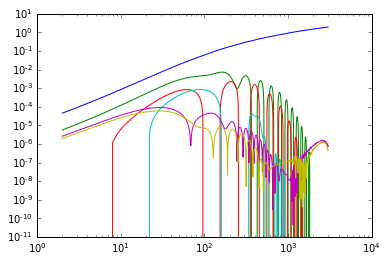

In [8]:
ii=1
plt.loglog(corrs[:,0],corrs[:,ii])
plt.plot(abs(corrs[:,0]),(corrs[:,ii+1]))
plt.plot(abs(corrs[:,0]),(corrs[:,ii+2]))
plt.plot((corrs[:,0]),(corrs[:,ii+3]))
plt.semilogy(abs(corrs[:,0]),abs(corrs[:,ii+4]))
plt.semilogy(abs(corrs[:,0]),abs(corrs[:,ii+5]))


In [9]:
from scipy.interpolate import interp1d
func = interp1d(L[0:250],corrs[0:250,2],bounds_error=False,fill_value=0.)
func2= interp1d(L[0:100],corrs[0:100,3],bounds_error=False,fill_value=0.)

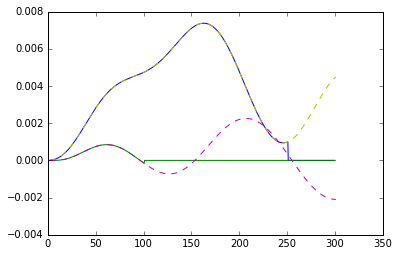

In [10]:
l=np.linspace(0,300,800)
plt.plot(l,func(l))
plt.plot(l,func2(l))
plt.plot(L[0:300],corrs[0:300,2],ls='--',c='y')
plt.plot(L[0:300],corrs[0:300,3],ls='--',c='m')

In [11]:
jj = 10

In [12]:
L[jj]

12.0

In [13]:
indices = np.zeros((66,2))
count = 0
for ii in np.arange(11):
    for nn in np.arange(ii,11):
        indices[count]=[ii,nn]
        count+=1
print(indices)

[[  0.   0.]
 [  0.   1.]
 [  0.   2.]
 [  0.   3.]
 [  0.   4.]
 [  0.   5.]
 [  0.   6.]
 [  0.   7.]
 [  0.   8.]
 [  0.   9.]
 [  0.  10.]
 [  1.   1.]
 [  1.   2.]
 [  1.   3.]
 [  1.   4.]
 [  1.   5.]
 [  1.   6.]
 [  1.   7.]
 [  1.   8.]
 [  1.   9.]
 [  1.  10.]
 [  2.   2.]
 [  2.   3.]
 [  2.   4.]
 [  2.   5.]
 [  2.   6.]
 [  2.   7.]
 [  2.   8.]
 [  2.   9.]
 [  2.  10.]
 [  3.   3.]
 [  3.   4.]
 [  3.   5.]
 [  3.   6.]
 [  3.   7.]
 [  3.   8.]
 [  3.   9.]
 [  3.  10.]
 [  4.   4.]
 [  4.   5.]
 [  4.   6.]
 [  4.   7.]
 [  4.   8.]
 [  4.   9.]
 [  4.  10.]
 [  5.   5.]
 [  5.   6.]
 [  5.   7.]
 [  5.   8.]
 [  5.   9.]
 [  5.  10.]
 [  6.   6.]
 [  6.   7.]
 [  6.   8.]
 [  6.   9.]
 [  6.  10.]
 [  7.   7.]
 [  7.   8.]
 [  7.   9.]
 [  7.  10.]
 [  8.   8.]
 [  8.   9.]
 [  8.  10.]
 [  9.   9.]
 [  9.  10.]
 [ 10.  10.]]


In [14]:
zs    = np.arange(0.,5+0.01,step=0.02)
zs[0] = 0.0


zmins = np.arange(0.0,4.9,0.1)
zmins[0] = 0.0
zmaxs = np.arange(0.2,5+0.1,0.1)
print(zmins)
print(zmaxs)

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3  1.4
  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7  2.8  2.9
  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1  4.2  4.3  4.4
  4.5  4.6  4.7  4.8]
[ 0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3  1.4  1.5  1.6
  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7  2.8  2.9  3.   3.1
  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1  4.2  4.3  4.4  4.5  4.6
  4.7  4.8  4.9  5. ]


In [15]:
interp_matrix = np.zeros((len(zs),len(zs)))


In [16]:
step    = 0.02

def get_matrix_at_L(Lind):
    filenum = 0
    
    zmin    = zmins[filenum]
    zmax    = zmaxs[filenum]
    filename = 'class_z%03dz%03d_cl.dat'%(zmin*100,zmax*100)
    corrs    = np.loadtxt(path+filename)
    corrs    = corrs[:,1::]
    print(corrs.shape)
    for ii in range(0,len(zs)):
        #print('ii',ii)
        for jj in range(ii,ii+6): #track correlation only for delta z = 0.5
            if jj < len(zs):
                z1 = zs[ii]
                z2 = zs[jj]
                #print(z1,z2)
                if z2<zmax+0.001:
                    #print('%.2f, %.2f, %.2f, %.2f'%(z1,z2,zmin,zmax))
                    ind1 = int((z1-zmin)/step)
                    ind2 = int((z2-zmin)/step)

                    index = np.all(np.equal(indices,[ind1,ind2]),axis=1)
                    #print(ind1,ind2,np.where(index))
                    val = corrs[Lind,index]
                else:
                    filenum+=1
                    #print(filenum)

                    zmin = zmins[filenum]
                    zmax = zmaxs[filenum]
                    #print('%.2f, %.2f, %.2f, %.2f'%(z1,z2,zmin,zmax))
                    filename = 'class_z%03dz%03d_cl.dat'%(zmin*100,zmax*100)
                    corrs    = np.loadtxt(path+filename)
                    corrs    = corrs[:,1::]
                    ind1 = int((z1-zmin)/step)
                    ind2 = int((z2-zmin)/step)
                    index = np.all(np.equal(indices,[ind1,ind2]),axis=1)
                    val = corrs[Lind,index]
                    #print(ind1,ind2,np.where(index))
                interp_matrix[ii,jj] = val

                interp_matrix[jj,ii] = interp_matrix[ii,jj] #hopefully creates only a pointer :)
    return interp_matrix


interp_matrix = get_matrix_at_L(100)

(2999, 66)


In [17]:
data = C.CosmoData(C.Planck2015[1],np.linspace(0.,5.,200))
zs[0]=0.01
chi  = data.chi(zs)

computing distances, derived parameters...
{'Neff': 3.046}
{'h': 0.68}
{'m_ncdm_tot': 0.0}
{'omega_m': 0.6608555034063286}


In [18]:
from scipy.interpolate import RectBivariateSpline as RBS
from scipy.interpolate import interp2d

zs1, zs2 = np.meshgrid(zs,zs)

chi1, chi2 = np.meshgrid(chi,chi)

func = RBS(chi,chi,interp_matrix,kx=1,ky=1)#, bounds_error=False, fill_value=0.) #RBS and interp2d are the same, just differnt wrappers

zs_t = np.arange(0,5+0.01,step=0.01)

chi_ = data.chi(zs_t)

spline = func(chi,chi)

/home/nessa/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


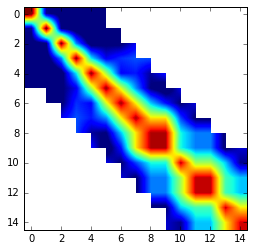

In [19]:
plt.figure()
plt.imshow(np.log(abs(interp_matrix)[0:15,0:15]),vmin=-20,vmax=1)
#plt.imshow(np.log(-interp_matrix),vmin=-20,vmax=1)
plt.show()

/home/nessa/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/home/nessa/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/home/nessa/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


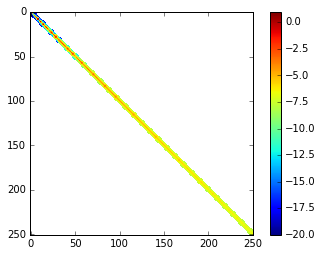

In [20]:
plt.figure()
plt.imshow(np.log(abs(spline)),vmin=-20,vmax=1)
plt.imshow(np.log(-spline),vmin=-20,vmax=1)
plt.colorbar()
plt.show()


[  8.54709881e+00  -3.01545383e-09   7.70810472e-10   2.74515026e-10
  -7.05561060e-11   5.82837390e-11   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]


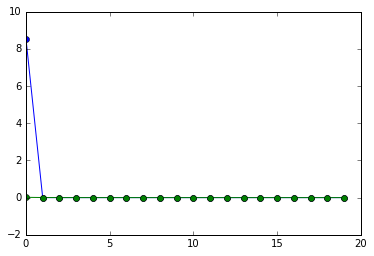

In [21]:
plt.plot(interp_matrix[0,0:20],marker='o')

plt.plot(interp_matrix[100,100:120],marker='o')

#plt.plot(abs(spline[0,0:20]),marker='^')
# plt.plot(spline[1,1:42],marker='^')
# plt.plot(spline[100,100:240],marker='^')

print(spline[0,0:20])

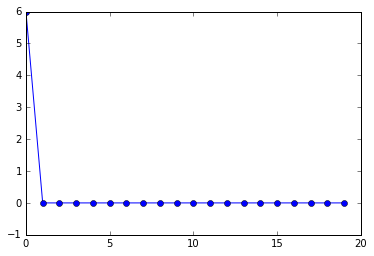

In [22]:
plt.plot(interp_matrix[1,1:21],marker='o')

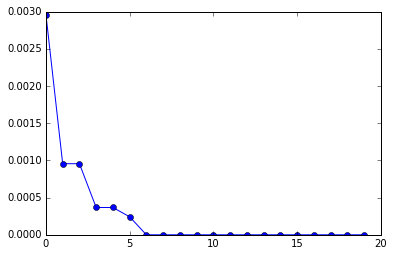

In [23]:
plt.plot(interp_matrix[200,200:220],marker='o')

In [24]:
## Appending the first file with zeros to make all files the same size

# path
# fname = 'class_z000z020_cl.dat'
# cl = np.loadtxt(path + fname)
# fname = 'class_z010z030_cl.dat'
# clall = np.loadtxt(path + fname)
# clnew = np.zeros_like(clall)


# for i in range(cl.shape[1]):
#     clnew[:cl.shape[0], i] = cl[:, i]
    
# path
# fname = 'class_z000z020_cl.dat'
# # np.savetxt(path + fname, clnew)
# clcheck = np.loadtxt(path + fname)
# clcheck.shape

In [25]:
from BispectraMain import dNdz_LSST, simple_bias, gal_clus 

def simple_kernel(x,xmax):
    return (xmax-x)/x/xmax

In [26]:
LSST_bin = 'all'

In [27]:
W_g = gal_clus(b=simple_bias,bin_num=LSST_bin,cosmo=data, dNdz=dNdz_LSST)

using z-bin None norm 65.6723025802


In [28]:
W_l = simple_kernel

In [29]:
def Cl_psidelta(chi,z,L,cls,cosmo=data):
    return -cosmo.lens_prefac*(chi/L)**2*(1.+z)*cls

# lens_prefac is 1.5*self.H_0**2.*self.Omega_m0/(const.LIGHT_SPEED**2)

In [30]:
L_index = np.arange(0,100)
print(L_index)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74
 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99]


In [31]:
cls = []
for L_ind in [0,10,50,100,500,1000]:
    print(L_ind)
    matrix          = get_matrix_at_L(L_ind)
    
    weighted_matrix = W_l(chi1,data.chi_cmb)*W_g(chi2,zs2)*Cl_psidelta(chi1,zs1,L[L_ind],matrix,cosmo=data)
    
    res=[]
    for ii in range(len(chi)):
        res+=[np.trapz(weighted_matrix[ii],chi)]
    
    cls+=[np.trapz(res,chi)]
    
cls = np.asarray(cls)

0
(2999, 66)
10
(2999, 66)
50
(2999, 66)
100
(2999, 66)
500
(2999, 66)
1000
(2999, 66)


In [32]:
L_sample = [L[ii] for ii in [0,10,50,100,500,1000]]
L_sample = np.asarray(L_sample)


In [33]:
LL, ll, theta = pickle.load(open('/home/nessa/Documents/Projects/LensingBispectrum/CMB-nonlinear/outputs/ells/ell_ang_full_Lmin1_Lmax3000_lmin1_lmax8000_lenL120_lenl140_lenang120_1e-04.pkl','r'))
CLkg = np.load('/home/nessa/Documents/Projects/LensingBispectrum/CMB-nonlinear/outputs/power_spectra/CL_kg_LSSTbinall_full_Planck2015_Lmin1-Lmax2999_halofit.npy')

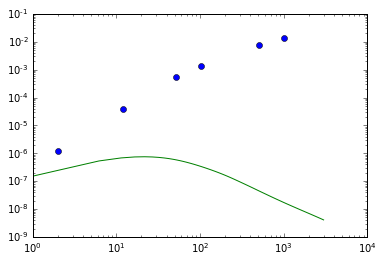

In [34]:
plt.figure()
plt.loglog(L_sample, - L_sample**2*cls, marker ='o', ls='')
plt.semilogx(LL,CLkg)